In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import os
import shutil


from utils import make_folder, sine_wave, read_frames_from_folder, slope_detect_positive, cross_correlation

In [2]:
folder_name = 'sine_waves'
isdir = os.path.isdir(folder_name)

if isdir is False:
    make_folder(folder_name)
else:
    print('Such directory already exists')

Such directory already exists


In [3]:
pixNoX = 100
pixNoY = 100
frNum = 30
steps = np.linspace(0.1, 0.7, 4)
f = 1
save_folder_name = folder_name

folders = sine_wave(pixNoX, pixNoY, frNum, steps, f, save_folder_name, delete_folders=True, noise=False)

In [47]:
print(folders)

['sine_waves/sine_waves_0.1', 'sine_waves/sine_waves_0.3', 'sine_waves/sine_waves_0.5', 'sine_waves/sine_waves_0.7']


In [34]:
folder_path = 'sine_waves/sine_waves_0.7'
frames  = read_frames_from_folder(folder_path)

In [35]:
# to check the size of the processed frames
path_to_images = 'sine_waves/sine_waves_0.7/'
image_file = cv.imread(path_to_images + '0.jpg', cv.IMREAD_GRAYSCALE)
width = image_file.shape[0]
height = image_file.shape[1]

print("x: ", width)
print("y: ",height)

x:  100
y:  50


[171.66929134 164.64173228 156.61023622 148.57874016 140.54724409
 132.51574803 124.48425197 115.4488189  107.41732283  99.38582677
  91.35433071  85.33070866  77.2992126   69.26771654  62.24015748
  55.21259843  49.18897638  43.16535433  37.14173228  32.12204724
  26.0984252   22.08267717  18.06692913  14.0511811   11.03937008
   8.02755906   5.01574803   4.01181102   2.00393701   1.
   1.           1.           2.00393701   3.00787402   5.01574803
   7.02362205  10.03543307  13.04724409  17.06299213  21.07874016
  25.09448819  30.11417323  35.13385827  41.15748031  47.18110236
  53.20472441  60.23228346  67.25984252  75.29133858  82.31889764
  90.3503937   97.37795276 105.40944882 113.44094488 121.47244094
 129.50393701 138.53937008 146.57086614 154.6023622  161.62992126
 169.66141732 177.69291339 184.72047244 191.7480315  198.77559055
 205.80314961 211.82677165 217.8503937  223.87401575 228.89370079
 233.91338583 237.92913386 241.94488189 245.96062992 248.97244094
 251.98425197 253.

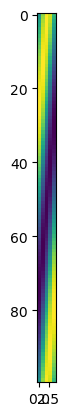

In [38]:
# implement slope measurement for one pixel
#iterate through each pixel to get a correlation result
frNum = 5
path_to_images = 'sine_waves/sine_waves_0.7/'
kernel = 1
threshold_bin = 0

pixel_x = 3
pixel_y = 10
pixel_array = []
for x in range(0, pixel_x + 1):
     for y in range(0, pixel_y + 1):
        pixel = [pixel_x, pixel_y]
pixel_array.append(pixel)         
         
#corr_full_y is 100x29 matrix which represents one pixel      
_, corr_full_y = cross_correlation(frNum, path_to_images, pixel_array[0], kernel, x_disp=False, y_disp=True)

plt.imshow(corr_full_y)
# print(corr_full_y.shape[1])
print(corr_full_y[:,-1])

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 1. 0. 1. 1.]
 [1. 0. 0.

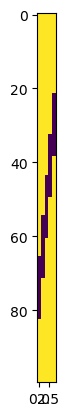

In [39]:
#clean version
T=20
image = np.copy(corr_full_y)
image[corr_full_y<T] = 0
image[corr_full_y>=T] = 1
plt.imshow(image)
print(image)

-10.999999999999996


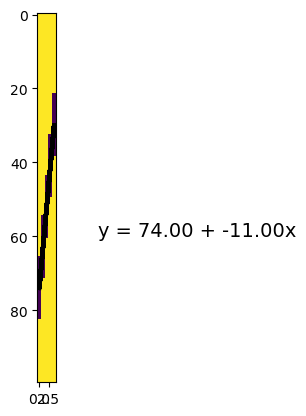

In [40]:
#example: fitting a line to cross correlation clean version from above (flipped)
plt.imshow(image)
#finding where the value is zero in the image matrix and filling that region with scatter points
zero_coords = np.argwhere(image==0)
# plt.xlim(0,10)
# plt.ylim(0,80)
# plt.scatter(zero_coords[:,1],zero_coords[:,0], color='purple')

#find line of best fit for scatter
slope, b = np.polyfit(zero_coords[:,1], zero_coords[:,0], 1)
if slope>0:
    zero_coords = np.argwhere(image==1)
    slope, b = np.polyfit(zero_coords[:,1], zero_coords[:,0], 1)
else:
    slope = slope


#add line of best fit to plot
plt.plot(zero_coords[:,1], slope*zero_coords[:,1]+b, color='black', linestyle='-', linewidth=3)

#add fitted regression equation to plot
plt.text(16, 60, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(slope) + 'x', size=14)
print(slope)

In [48]:
slope = 3

# frNum = 10
# frNum = 8 #for 0.5
frNum = 5 #for 0.7

path_to_images = 'sine_waves/sine_waves_0.7/'

kernel = 1
threshold_bin = 0
image_1 = cv.imread(path_to_images + '0.jpg', cv.IMREAD_GRAYSCALE)
slopes = np.zeros([image_1.shape[0], image_1.shape[1]])  # empty matrix of 100x100

# T = 200 #2 percent
T = 20
for i in range(image_1.shape[0]):
    for j in range(image_1.shape[1]):
        pixel=[i, j]
        try:
            slope = slope_detect_positive(T, frNum, path_to_images, pixel, kernel)
        except ValueError:
            slope = None
        slopes[i, j] = slope
        print(pixel, slope)


[0, 0] -10.999999999999996
[0, 1] -10.999999999999996
[0, 2] -10.999999999999996
[0, 3] -10.999999999999996
[0, 4] -10.999999999999996
[0, 5] -10.999999999999996
[0, 6] -10.999999999999996
[0, 7] -10.999999999999996
[0, 8] -10.999999999999996
[0, 9] -10.999999999999996
[0, 10] -10.999999999999996
[0, 11] -10.999999999999996
[0, 12] -10.999999999999996
[0, 13] -10.999999999999996
[0, 14] -10.999999999999996
[0, 15] -10.999999999999996
[0, 16] -10.999999999999996
[0, 17] -10.999999999999996
[0, 18] -10.999999999999996
[0, 19] -10.999999999999996
[0, 20] -10.999999999999996
[0, 21] -10.999999999999996
[0, 22] -10.999999999999996
[0, 23] -10.999999999999996
[0, 24] -10.999999999999996
[0, 25] -10.999999999999996
[0, 26] -10.999999999999996
[0, 27] -10.999999999999996
[0, 28] -10.999999999999996
[0, 29] -10.999999999999996
[0, 30] -10.999999999999996
[0, 31] -10.999999999999996
[0, 32] -10.999999999999996
[0, 33] -10.999999999999996
[0, 34] -10.999999999999996
[0, 35] -10.999999999999996
[0

In [46]:
print(slopes[19,36])

-10.999999999999996


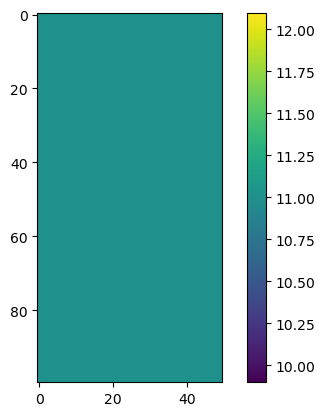

In [45]:
round_slopes = np.round(slopes,2)
plt.imshow(abs(round_slopes))
plt.colorbar()